This file contains the group work for Stage II task 1.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

First we need to re-import the merged dataframe that we created for Stage I.

In [2]:
dfMerged = pd.read_csv("Data/ProjectDataStage1WIDEFORMAT.csv")

dfMerged.head(50)

,Unnamed: 0,countyFIPS,County Name,State,population,2020-01-22_Cases,2020-01-23_Cases,2020-01-24_Cases,2020-01-25_Cases,2020-01-26_Cases,...,2023-07-14_Deaths,2023-07-15_Deaths,2023-07-16_Deaths,2023-07-17_Deaths,2023-07-18_Deaths,2023-07-19_Deaths,2023-07-20_Deaths,2023-07-21_Deaths,2023-07-22_Deaths,2023-07-23_Deaths
0,0,0,Statewide Unallocated,AL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1001,Autauga County,AL,55869,0,0,0,0,0,...,235,235,235,235,235,235,235,235,235,235
2,2,1003,Baldwin County,AL,223234,0,0,0,0,0,...,731,731,731,731,731,731,731,731,731,731
3,3,1005,Barbour County,AL,24686,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,104
4,4,1007,Bibb County,AL,22394,0,0,0,0,0,...,111,111,111,111,111,111,111,111,111,111
5,5,1009,Blount County,AL,57826,0,0,0,0,0,...,261,261,261,261,261,261,261,261,261,261
6,6,1011,Bullock County,AL,10101,0,0,0,0,0,...,54,54,54,54,54,54,54,54,54,54
7,7,1013,Butler County,AL,19448,0,0,0,0,0,...,132,132,132,132,132,132,132,132,132,132
8,8,1015,Calhoun County,AL,113605,0,0,0,0,0,...,683,683,683,683,683,683,683,683,683,683
9,9,1017,Chambers County,AL,33254,0,0,0,0,0,...,172,172,172,172,172,172,172,172,172,172


Our first step will be to chop up the dataset to reduce the scope of the data. For this stage, we are only interested in data that falls between July 2020 and December 2020.

In [3]:
# Create a duplicate of dfMerged
df = dfMerged.copy()

# Identify columns to drop based on column headers.
# If a column is in one of the ranges that we want, and contains 'Cases' or 'Deaths', it is going to be removed
columns_to_drop = [col for col in df.columns if (('2020-01-22' <= col <= '2020-07-01') or ('2021-01-01' <= col)) and
                                                  (('Cases' in col) or ('Deaths' in col))]

# Drop the identified columns
df.drop(columns=columns_to_drop, inplace=True)

# Now, df contains a copy of dfMerged with only the data we want for this stage.

df.head(5)

,Unnamed: 0,countyFIPS,County Name,State,population,2020-07-01_Cases,2020-07-02_Cases,2020-07-03_Cases,2020-07-04_Cases,2020-07-05_Cases,...,2020-12-22_Deaths,2020-12-23_Deaths,2020-12-24_Deaths,2020-12-25_Deaths,2020-12-26_Deaths,2020-12-27_Deaths,2020-12-28_Deaths,2020-12-29_Deaths,2020-12-30_Deaths,2020-12-31_Deaths
0,0,0,Statewide Unallocated,AL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1001,Autauga County,AL,55869,553,561,568,591,615,...,44,46,46,46,46,47,47,47,48,48
2,2,1003,Baldwin County,AL,223234,703,751,845,863,881,...,149,151,151,151,151,152,152,156,160,161
3,3,1005,Barbour County,AL,24686,326,335,348,350,352,...,32,32,32,32,32,32,32,32,32,32
4,4,1007,Bibb County,AL,22394,174,179,189,190,193,...,42,42,42,42,42,42,42,42,46,46


With the prerequisite work complete, we can start answering the questions in this stage of the project.

## Compare the weekly statistics (mean, median, mode) for number of cases and deaths across US.

To do this we will create a new dataframe that contains data from across the US in a single week. 

In [4]:
# Filter columns that contain 'Cases' or 'Deaths' in their names
cases_df = df.filter(like='Cases', axis=1)  # Columns containing 'Cases'
deaths_df = df.filter(like='Deaths', axis=1)   # Columns containing 'Deaths'

cases_df.head()

,2020-07-01_Cases,2020-07-02_Cases,2020-07-03_Cases,2020-07-04_Cases,2020-07-05_Cases,2020-07-06_Cases,2020-07-07_Cases,2020-07-08_Cases,2020-07-09_Cases,2020-07-10_Cases,...,2020-12-22_Cases,2020-12-23_Cases,2020-12-24_Cases,2020-12-25_Cases,2020-12-26_Cases,2020-12-27_Cases,2020-12-28_Cases,2020-12-29_Cases,2020-12-30_Cases,2020-12-31_Cases
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,553,561,568,591,615,618,644,651,661,670,...,3841,3889,3942,3990,3999,4029,4065,4105,4164,4190
2,703,751,845,863,881,911,997,1056,1131,1187,...,12155,12321,12521,12666,12708,12825,12962,13172,13392,13601
3,326,335,348,350,352,356,360,366,371,381,...,1363,1383,1390,1396,1398,1406,1417,1462,1492,1514
4,174,179,189,190,193,197,199,201,211,218,...,1660,1683,1711,1725,1739,1746,1762,1792,1817,1834


In [5]:
deaths_df.head()

,2020-07-01_Deaths,2020-07-02_Deaths,2020-07-03_Deaths,2020-07-04_Deaths,2020-07-05_Deaths,2020-07-06_Deaths,2020-07-07_Deaths,2020-07-08_Deaths,2020-07-09_Deaths,2020-07-10_Deaths,...,2020-12-22_Deaths,2020-12-23_Deaths,2020-12-24_Deaths,2020-12-25_Deaths,2020-12-26_Deaths,2020-12-27_Deaths,2020-12-28_Deaths,2020-12-29_Deaths,2020-12-30_Deaths,2020-12-31_Deaths
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12,13,13,13,13,13,13,13,14,15,...,44,46,46,46,46,47,47,47,48,48
2,10,10,10,10,10,10,10,10,11,12,...,149,151,151,151,151,152,152,156,160,161
3,1,1,2,2,2,2,2,2,2,2,...,32,32,32,32,32,32,32,32,32,32
4,1,1,1,1,1,1,1,1,1,1,...,42,42,42,42,42,42,42,42,46,46


In [6]:
# Create a new DataFrame with a single row containing the sum of each column, to represent the US's collective statistics
cases_US = cases_df.sum(axis=0).to_frame().T

cases_US.head()

,2020-07-01_Cases,2020-07-02_Cases,2020-07-03_Cases,2020-07-04_Cases,2020-07-05_Cases,2020-07-06_Cases,2020-07-07_Cases,2020-07-08_Cases,2020-07-09_Cases,2020-07-10_Cases,...,2020-12-22_Cases,2020-12-23_Cases,2020-12-24_Cases,2020-12-25_Cases,2020-12-26_Cases,2020-12-27_Cases,2020-12-28_Cases,2020-12-29_Cases,2020-12-30_Cases,2020-12-31_Cases
0,2748327,2806125,2866754,2918327,2961395,3005789,3063072,3126511,3192412,3262685,...,18204174,18416088,18609135,18704673,18833238,18959735,19201773,19460991,19743342,19980329


In [7]:
deaths_US = deaths_df.sum(axis=0).to_frame().T

deaths_US.head()

,2020-07-01_Deaths,2020-07-02_Deaths,2020-07-03_Deaths,2020-07-04_Deaths,2020-07-05_Deaths,2020-07-06_Deaths,2020-07-07_Deaths,2020-07-08_Deaths,2020-07-09_Deaths,2020-07-10_Deaths,...,2020-12-22_Deaths,2020-12-23_Deaths,2020-12-24_Deaths,2020-12-25_Deaths,2020-12-26_Deaths,2020-12-27_Deaths,2020-12-28_Deaths,2020-12-29_Deaths,2020-12-30_Deaths,2020-12-31_Deaths
0,128962,129630,130406,130890,131290,131791,132795,133698,134701,135632,...,328950,332017,335328,336496,338748,340430,344373,348147,351694,355294


In [8]:
# Convert the DataFrame to a NumPy array
cases_array = cases_US.to_numpy()

# Calculate the mean for every 7 columns
num_columns = cases_array.shape[1]
window_size = 7
means = []

for i in range(0, num_columns, window_size):
    window = cases_array[:, i:i+window_size]
    window_mean = np.mean(window)
    means.append(window_mean)

# Create a new DataFrame to store the means
cases_mean_df = pd.DataFrame({'Mean': means})

# Print the DataFrame with means and the week number
for week_number, mean in enumerate(means, start=1):
    print(f"The mean number of cases for week {week_number} was: {mean:.0f}")

The mean number of cases for week 1 was: 2909970
The mean number of cases for week 2 was: 3321580
The mean number of cases for week 3 was: 3785437
The mean number of cases for week 4 was: 4236666
The mean number of cases for week 5 was: 4656834
The mean number of cases for week 6 was: 5026543
The mean number of cases for week 7 was: 5358609
The mean number of cases for week 8 was: 5648929
The mean number of cases for week 9 was: 5930633
The mean number of cases for week 10 was: 6203170
The mean number of cases for week 11 was: 6447367
The mean number of cases for week 12 was: 6726193
The mean number of cases for week 13 was: 7026356
The mean number of cases for week 14 was: 7326642
The mean number of cases for week 15 was: 7662155
The mean number of cases for week 16 was: 8053635
The mean number of cases for week 17 was: 8509565
The mean number of cases for week 18 was: 9098668
The mean number of cases for week 19 was: 9894192
The mean number of cases for week 20 was: 10915530
The mean

In [9]:
# Convert the DataFrame to a NumPy array
deaths_array = deaths_US.to_numpy()

# Calculate the mean for every 7 columns
num_columns = deaths_array.shape[1]
window_size = 7
means = []

for i in range(0, num_columns, window_size):
    window = deaths_array[:, i:i+window_size]
    window_mean = np.mean(window)
    means.append(window_mean)

# Create a new DataFrame to store the means
deaths_mean_df = pd.DataFrame({'Mean': means})

# Print the DataFrame with means and the week number
for week_number, mean in enumerate(means, start=1):
    print(f"The mean number of deaths for week {week_number} was: {mean:.0f}")

The mean number of deaths for week 1 was: 130823
The mean number of deaths for week 2 was: 136320
The mean number of deaths for week 3 was: 142726
The mean number of deaths for week 4 was: 149850
The mean number of deaths for week 5 was: 157626
The mean number of deaths for week 6 was: 165000
The mean number of deaths for week 7 was: 172215
The mean number of deaths for week 8 was: 178614
The mean number of deaths for week 9 was: 184788
The mean number of deaths for week 10 was: 190104
The mean number of deaths for week 11 was: 194967
The mean number of deaths for week 12 was: 200066
The mean number of deaths for week 13 was: 204910
The mean number of deaths for week 14 was: 209503
The mean number of deaths for week 15 was: 214283
The mean number of deaths for week 16 was: 219235
The mean number of deaths for week 17 was: 224967
The mean number of deaths for week 18 was: 230934
The mean number of deaths for week 19 was: 238288
The mean number of deaths for week 20 was: 246701
The mean 

In [10]:
# Calculate the median for every 7 columns
num_columns = cases_array.shape[1]
window_size = 7
medians = []

for i in range(0, num_columns, window_size):
    window = cases_array[:, i:i+window_size]
    window_median = np.median(window)
    medians.append(window_median)

# Create a new DataFrame to store the medians
cases_median_df = pd.DataFrame({'Median': medians})

# Print the DataFrame with medians and the week number
for week_number, median in enumerate(medians, start=1):
    print(f"The median number of cases for week {week_number} was: {median:.0f}")

The median number of cases for week 1 was: 2918327
The median number of cases for week 2 was: 3328112
The median number of cases for week 3 was: 3796034
The median number of cases for week 4 was: 4247760
The median number of cases for week 5 was: 4670339
The median number of cases for week 6 was: 5037296
The median number of cases for week 7 was: 5369778
The median number of cases for week 8 was: 5657641
The median number of cases for week 9 was: 5938481
The median number of cases for week 10 was: 6216526
The median number of cases for week 11 was: 6452866
The median number of cases for week 12 was: 6731215
The median number of cases for week 13 was: 7037982
The median number of cases for week 14 was: 7336811
The median number of cases for week 15 was: 7668387
The median number of cases for week 16 was: 8061822
The median number of cases for week 17 was: 8515412
The median number of cases for week 18 was: 9072426
The median number of cases for week 19 was: 9893150
The median number of 

In [11]:
# Calculate the median for every 7 columns
num_columns = deaths_array.shape[1]
window_size = 7
medians = []

for i in range(0, num_columns, window_size):
    window = deaths_array[:, i:i+window_size]
    window_median = np.median(window)
    medians.append(window_median)

# Create a new DataFrame to store the medians
deaths_median_df = pd.DataFrame({'Median': medians})

# Print the DataFrame with medians and the week number
for week_number, median in enumerate(medians, start=1):
    print(f"The median number of deaths for week {week_number} was: {median:.0f}")

The median number of deaths for week 1 was: 130890
The median number of deaths for week 2 was: 136457
The median number of deaths for week 3 was: 142911
The median number of deaths for week 4 was: 150192
The median number of deaths for week 5 was: 158038
The median number of deaths for week 6 was: 165239
The median number of deaths for week 7 was: 172546
The median number of deaths for week 8 was: 178918
The median number of deaths for week 9 was: 185062
The median number of deaths for week 10 was: 190435
The median number of deaths for week 11 was: 195194
The median number of deaths for week 12 was: 200332
The median number of deaths for week 13 was: 205260
The median number of deaths for week 14 was: 209794
The median number of deaths for week 15 was: 214479
The median number of deaths for week 16 was: 219427
The median number of deaths for week 17 was: 225171
The median number of deaths for week 18 was: 231187
The median number of deaths for week 19 was: 238528
The median number of 

In [12]:
# Calculate the mode for every 7 columns
num_columns = cases_array.shape[1]
window_size = 7
modes = []

for i in range(0, num_columns, window_size):
    window = cases_array[:, i:i+window_size]
    window_mode, _ = stats.mode(window, axis=None, keepdims=True)  # Specify keepdims=True to avoid annoying warning
    modes.append(window_mode[0])  # Get the mode value

# Create a new DataFrame to store the modes
cases_mode_df = pd.DataFrame({'Mode': modes})

# Print the DataFrame with modes and the week number
for week_number, mode in enumerate(modes, start=1):
    print(f"The mode number of cases for week {week_number} was: {mode:.0f}")

The mode number of cases for week 1 was: 2748327
The mode number of cases for week 2 was: 3126511
The mode number of cases for week 3 was: 3577705
The mode number of cases for week 4 was: 4042729
The mode number of cases for week 5 was: 4478146
The mode number of cases for week 6 was: 4870082
The mode number of cases for week 7 was: 5219825
The mode number of cases for week 8 was: 5526317
The mode number of cases for week 9 was: 5807342
The mode number of cases for week 10 was: 6084681
The mode number of cases for week 11 was: 6333208
The mode number of cases for week 12 was: 6599417
The mode number of cases for week 13 was: 6894327
The mode number of cases for week 14 was: 7191626
The mode number of cases for week 15 was: 7504648
The mode number of cases for week 16 was: 7869353
The mode number of cases for week 17 was: 8289604
The mode number of cases for week 18 was: 8805390
The mode number of cases for week 19 was: 9518980
The mode number of cases for week 20 was: 10437353
The mode

In [13]:
# Calculate the mode for every 7 columns
num_columns = deaths_array.shape[1]
window_size = 7
modes = []

for i in range(0, num_columns, window_size):
    window = deaths_array[:, i:i+window_size]
    window_mode, _ = stats.mode(window, axis=None, keepdims=True)
    modes.append(window_mode[0])  # Get the mode value

# Create a new DataFrame to store the modes
deaths_mode_df = pd.DataFrame({'Mode': modes})

# Print the DataFrame with modes and the week number
for week_number, mode in enumerate(modes, start=1):
    print(f"The mode number of deaths for week {week_number} was: {mode:.0f}")


The mode number of deaths for week 1 was: 128962
The mode number of deaths for week 2 was: 133698
The mode number of deaths for week 3 was: 139860
The mode number of deaths for week 4 was: 146682
The mode number of deaths for week 5 was: 154207
The mode number of deaths for week 6 was: 161831
The mode number of deaths for week 7 was: 169328
The mode number of deaths for week 8 was: 175991
The mode number of deaths for week 9 was: 182304
The mode number of deaths for week 10 was: 187981
The mode number of deaths for week 11 was: 192665
The mode number of deaths for week 12 was: 198080
The mode number of deaths for week 13 was: 202860
The mode number of deaths for week 14 was: 207510
The mode number of deaths for week 15 was: 212096
The mode number of deaths for week 16 was: 216771
The mode number of deaths for week 17 was: 222501
The mode number of deaths for week 18 was: 228225
The mode number of deaths for week 19 was: 234795
The mode number of deaths for week 20 was: 243111
The mode 

No surprises here, both the median and mode for both cases and deaths is increasing every week. But since the data is cumulative this isn't very useful for comparing the peaks.

In [14]:
cases_delta_array = cases_array[:, 1:] - cases_array[:, :-1]

# add the first column from deaths_array as the first column of diff_array
first_column = cases_array[:, 0].reshape(-1, 1)
cases_delta_array = np.hstack((first_column, cases_delta_array))
#the value for the first column was calculated externally in excel to save time
cases_delta_array[0, 0] = 20743

print(cases_delta_array)

[[ 20743  57798  60629  51573  43068  44394  57283  63439  65901  70273
   65427  59600  54306  69592  66095  72424  79331  66574  60782  54835
   64615  66463  67313  73458  64260  55739  50689  60756  63202  65893
   66502  59798  49528  40209  54754  55252  54366  60095  52753  45150
   36209  49679  51491  49176  52260  48517  36977  34401  41333  43828
   42300  46203  42821  32267  33164  39057  45213  44563  44809  41767
   33540  31036  41853  39771  42444  47941  41460  31063  25673  24677
   35269  36835  44574  38249  32468  33192  38451  42440  44011  45360
   42427  32004  39593  51663  39852  44104  55144  44407  31825  35646
   39461  46712  47052  47726  50407  34687  37091  44298  51761  56583
   56974  50182  44086  46362  52468  58050  67548  67387  57534  48202
   56674  59662  63244  75936  80334  69538  63225  71382  71848  83523
   88862  95947  82227 142407  92122  99663 112362 132624 129276 112270
  107498 133059 146665 156981 151650 177185 171411 133451 153760

In [15]:
deaths_delta_array = deaths_array[:, 1:] - deaths_array[:, :-1]


first_column = deaths_array[:, 0].reshape(-1, 1)
deaths_delta_array = np.hstack((first_column, deaths_delta_array))
deaths_delta_array[0, 0] = 734

print(deaths_delta_array)

[[ 734  668  776  484  400  501 1004  903 1003  931  825  710  596 1056
  1041 1043  998 1010  719  708 1198 1146 1216 1375  919  736  742  637
  1900 1396 1283 1152  678  630 1241 1244 1167 1213 1028  789  659 1318
  1323 1038  996 1184  666  597 1071 1111 1011  927  989  547  523 1018
  1298  908  908  942  505  584  952  878  820  812  822  498  354  391
   987  954  902  673  450  453  932 1051  754  798  700  367  351  783
  1027  814  788  798  317  349  685  899  762  783  739  386  254  842
   820  806  899  678  599  384  698  611 1090  815  751  464  670  898
  1042  900  969  801  454  778  896  926 1025  906 1031  509  686 1260
  1153 1440 1146 1147  660 1123 1266 1534 1148 1259 1547  776  966 1500
  1876 2147 1681 1634 1197 1689 1882 2168 1374 1473 1838 1031 1686 2334
  2644 2639 2549 2809 1331 1831 2414 3152 2797 3468 2828 1743 2117 2854
  3340 3300 2899 3311 1993 2029 2585 3067 3311 1168 2252 1682 3943 3774
  3547 3600]]


It isn't so obvious to tell what is happening in this data without some kind of visualization, so we will graph these.

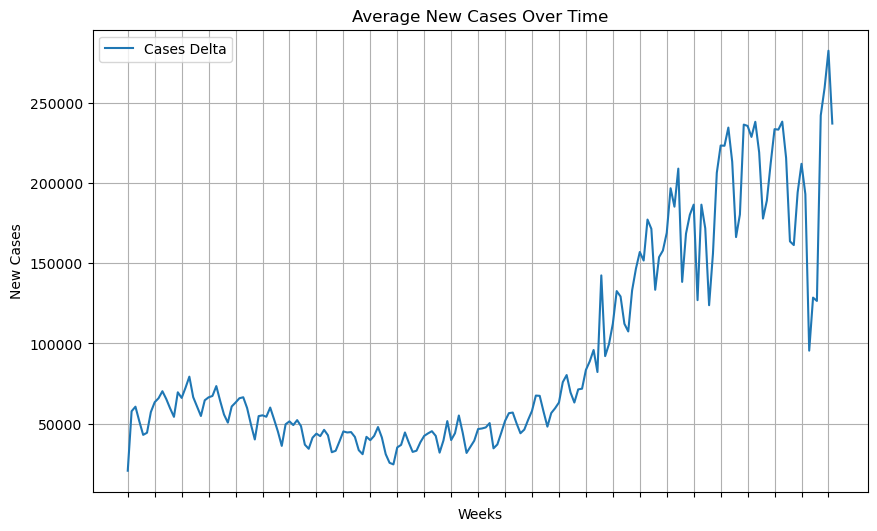

In [16]:
# Assuming cases_delta_array is your NumPy array containing the data

# Create an array for the x-axis
x = np.arange(cases_delta_array.shape[1])

# Plot the data as a line chart
plt.figure(figsize=(10, 6))
plt.plot(x, cases_delta_array[0, :], label='Cases Delta', marker='', linestyle='-')

plt.xlabel('Weeks')
plt.ylabel('New Cases')
plt.title('Average New Cases Over Time')
plt.legend()

plt.grid(True)

# Set custom x-axis ticks every 7 days without labels
x_ticks = np.arange(0, cases_delta_array.shape[1], 7)
plt.xticks(x_ticks, [])
plt.show()

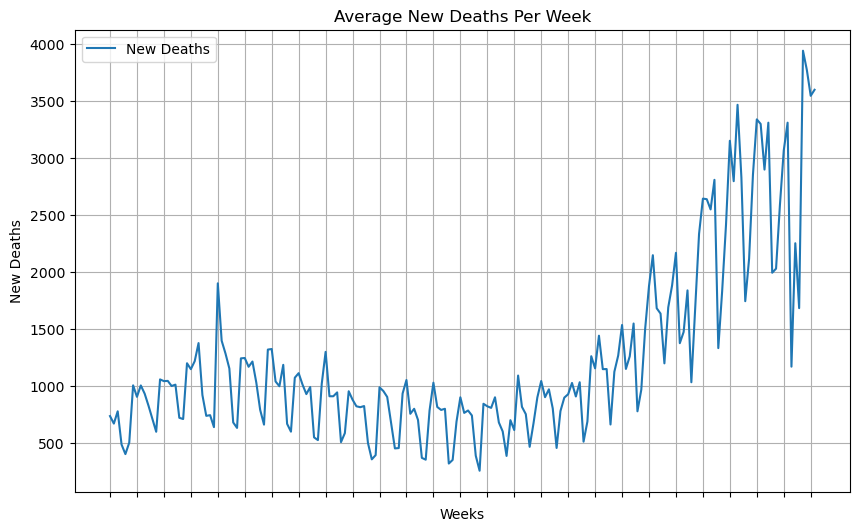

In [17]:
# Create an array for the x-axis
x = np.arange(deaths_delta_array.shape[1])

# Plot the data as a line chart
plt.figure(figsize=(10, 6))
plt.plot(x, deaths_delta_array[0, :], label='New Deaths', marker='', linestyle='-')

plt.xlabel('Weeks')
plt.ylabel('New Deaths')
plt.title('Average New Deaths Per Week')
plt.legend()


plt.grid(True)

x_ticks = np.arange(0, cases_delta_array.shape[1], 7)
plt.xticks(x_ticks, [])
plt.show()

In [18]:
# Calculate the number of elements and the number of 7-element groups
num_elements = cases_delta_array.shape[1]
num_groups = num_elements // 7

# Initialize arrays to store the results
cases_means = np.empty(num_groups)
cases_medians = np.empty(num_groups)
cases_modes = np.empty(num_groups)

# Calculate statistics for each 7-element group
for i in range(num_groups):
    start_index = i * 7
    end_index = start_index + 7
    group_data = cases_delta_array[0, start_index:end_index]

    # Calculate mean
    cases_means[i] = np.mean(group_data)

    # Calculate median
    cases_medians[i] = np.median(group_data)

    # Calculate mode (using stats.mode)
    mode_result = stats.mode(group_data)
    cases_modes[i] = mode_result.mode[0]

# Now, 'means', 'medians', and 'modes' contain the statistics for each 7-element group

C:\Users\Billy\AppData\Local\Temp\ipykernel_5976\149670414.py:23: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(group_data)


In [19]:
# Calculate the number of elements and the number of 7-element groups
num_elements = deaths_delta_array.shape[1]
num_groups = num_elements // 7

# Initialize arrays to store the results
deaths_means = np.empty(num_groups)
deaths_medians = np.empty(num_groups)
deaths_modes = np.empty(num_groups)

# Calculate statistics for each 7-element group
for i in range(num_groups):
    start_index = i * 7
    end_index = start_index + 7
    group_data = deaths_delta_array[0, start_index:end_index]

    # Calculate mean
    deaths_means[i] = np.mean(group_data)

    # Calculate median
    deaths_medians[i] = np.median(group_data)

    # Calculate mode (using stats.mode)
    mode_result = stats.mode(group_data)
    deaths_modes[i] = mode_result.mode[0]

# Now, 'deaths_means', 'deaths_medians', and 'deaths_modes' contain the statistics for each 7-element group for deaths data.


C:\Users\Billy\AppData\Local\Temp\ipykernel_5976\290019327.py:23: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(group_data)


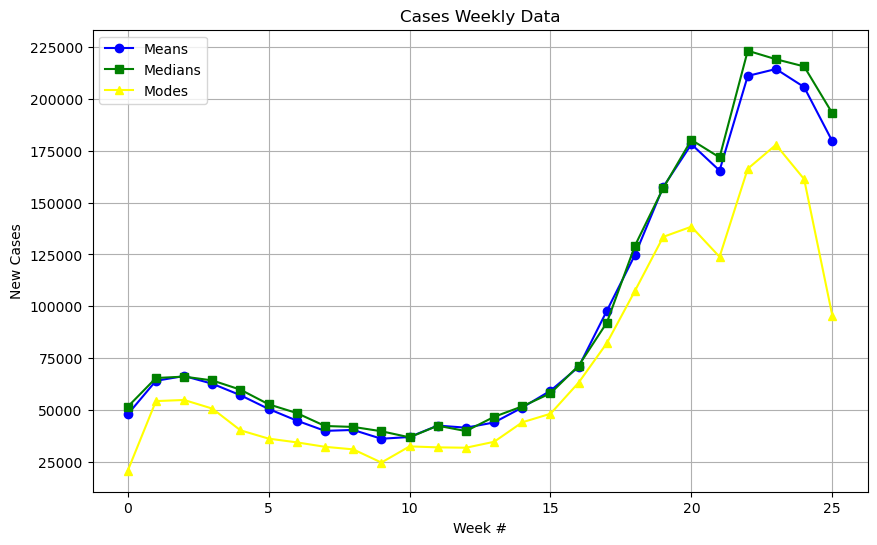

In [20]:
x = np.arange(len(cases_means))

# Plot the data for cases
plt.figure(figsize=(10, 6))
plt.plot(x, cases_means, label='Means', color='blue', marker='o', linestyle='-')
plt.plot(x, cases_medians, label='Medians', color='green', marker='s', linestyle='-')
plt.plot(x, cases_modes, label='Modes', color='yellow', marker='^', linestyle='-')

plt.xlabel('Week #')
plt.ylabel('New Cases')
plt.title('Cases Weekly Data')
plt.legend()

plt.grid(True)
plt.show()

This smooths out our case data abit, and we can make some observations. The mode is consistently lower than the rest, implying that the data trend towards negative skewness. Aside from a few turbulent weeks, the mean and median follow one another rather closely however. This suggests that the number of cases is roughly symmetrical, aside from the fact that lower numbers are more likely to appear more often.

You can see that there are jumps in cases around week 2, and a big peak at week 22.

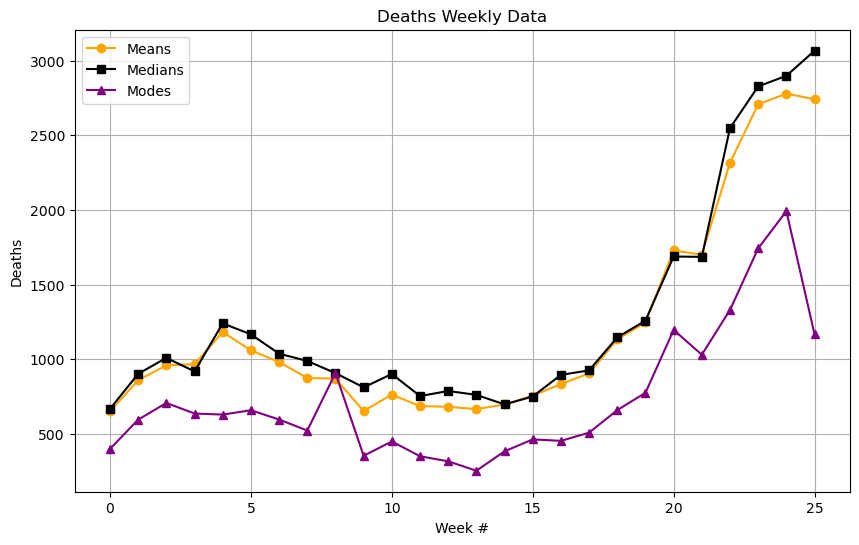

In [21]:
x = np.arange(len(cases_means))

# Plot the data for deaths
plt.figure(figsize=(10, 6))
plt.plot(x, deaths_means, label='Means', color='orange', marker='o', linestyle='-')
plt.plot(x, deaths_medians, label='Medians', color='black', marker='s', linestyle='-')
plt.plot(x, deaths_modes, label='Modes', color='purple', marker='^', linestyle='-')

plt.xlabel('Week #')
plt.ylabel('Deaths')
plt.title('Deaths Weekly Data')
plt.legend()

plt.grid(True)
plt.show()

The deaths trend follows the same rough trajectory of the cases, but the values are thankfully much lower. The modes, again, are usually lower than the mean and median, which suggests a tendency for the most common value to be lower.

The peaks seen in the cases at week 2 and 22 are present in the deaths data as well.

The early peaks may be related to summer disease transmission, or lagging effects of gatherings for celebrations such as the 4th of July. The huge peak at the end of the year may be related to holiday travel for occasions such as Christmas and New Year's Celebrations.

# Compare the data against other countries of the world. 
### Choose at least 5 similar populations countries to compare.
### Plot weekly trends (cases and deaths) of US and compare other countries. Utilize aggregrate, normalized by population, difference in cases, and log normalized values. (hint: do normalization: number of cases per 100,000, and then use np.log10())
### Identify the peak weeks of the cases and deaths in US and other countries. Try to do background research to see what the reasoning for the peaks can be (holidays, vacations, travel, weather, etc). Explain with a description in the notebooks.

We'll start by loading the csv, and creating a dictionary to get an idea of which bits of data are relevant to us.

In [22]:
df = pd.read_csv('Data/owid-covid-data.csv')

data_dict = {}

# loop through to create a simple data dictionary that gives us an idea of what is in this mammoth dataset
for column in df.columns:
    # Get the data type of the column
    data_type = str(df[column].dtype)

    # Add the column name and data type to the data dictionary
    data_dict[column] = data_type

for key, value in data_dict.items():
    print(f"{key}: {value}")

iso_code: object
continent: object
location: object
date: object
total_cases: float64
new_cases: float64
new_cases_smoothed: float64
total_deaths: float64
new_deaths: float64
new_deaths_smoothed: float64
total_cases_per_million: float64
new_cases_per_million: float64
new_cases_smoothed_per_million: float64
total_deaths_per_million: float64
new_deaths_per_million: float64
new_deaths_smoothed_per_million: float64
reproduction_rate: float64
icu_patients: float64
icu_patients_per_million: float64
hosp_patients: float64
hosp_patients_per_million: float64
weekly_icu_admissions: float64
weekly_icu_admissions_per_million: float64
weekly_hosp_admissions: float64
weekly_hosp_admissions_per_million: float64
total_tests: float64
new_tests: float64
total_tests_per_thousand: float64
new_tests_per_thousand: float64
new_tests_smoothed: float64
new_tests_smoothed_per_thousand: float64
positive_rate: float64
tests_per_case: float64
tests_units: object
total_vaccinations: float64
people_vaccinated: float

To trim the data down a bit we can remove countries that we won't be comparing the US to. The closest countries with most comparable populations to the US are Indonesa, Pakistan, Nigeria, and Bangladesh, so we will be using them. Conveniently all countries are grouped together by an ISO code used by the UN to classify the countries, which is an easy thing to use to drop data we don't need.

In [23]:
# List of country names to keep
countries_to_keep = ['IDN', 'PAK', 'NGA', 'BRA', 'BGD']

filtered_df = df[df['iso_code'].isin(countries_to_keep)]

# Now, 'filtered_df' contains only rows with the specified countries
filtered_df.head(50000)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
24680,BGD,Asia,Bangladesh,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,44.7,34.808,0.8,72.59,0.632,171186368.0,NaN,NaN,NaN,NaN
24681,BGD,Asia,Bangladesh,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,44.7,34.808,0.8,72.59,0.632,171186368.0,NaN,NaN,NaN,NaN
24682,BGD,Asia,Bangladesh,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,44.7,34.808,0.8,72.59,0.632,171186368.0,NaN,NaN,NaN,NaN
24683,BGD,Asia,Bangladesh,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,44.7,34.808,0.8,72.59,0.632,171186368.0,NaN,NaN,NaN,NaN
24684,BGD,Asia,Bangladesh,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,44.7,34.808,0.8,72.59,0.632,171186368.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234328,PAK,Asia,Pakistan,2023-09-30,1580631.0,0.0,0.0,30656.0,0.0,0.0,...,36.7,59.607,0.6,67.27,0.557,235824864.0,NaN,NaN,NaN,NaN
234329,PAK,Asia,Pakistan,2023-10-01,1580631.0,0.0,0.0,30656.0,0.0,0.0,...,36.7,59.607,0.6,67.27,0.557,235824864.0,NaN,NaN,NaN,NaN
234330,PAK,Asia,Pakistan,2023-10-02,1580631.0,0.0,0.0,30656.0,0.0,0.0,...,36.7,59.607,0.6,67.27,0.557,235824864.0,NaN,NaN,NaN,NaN
234331,PAK,Asia,Pakistan,2023-10-03,1580631.0,0.0,0.0,30656.0,0.0,0.0,...,36.7,59.607,0.6,67.27,0.557,235824864.0,NaN,NaN,NaN,NaN


In [24]:
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Define the date range
start_date = pd.to_datetime('2020-07-01')
end_date = pd.to_datetime('2020-12-31')

# Create a boolean mask to identify rows that fall within the date range
mask = (filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)

# Use the mask to filter the DataFrame
filtered_df = filtered_df[mask]

# Now, 'filtered_df' contains rows with date values within the specified range
filtered_df.head(50000)

C:\Users\Billy\AppData\Local\Temp\ipykernel_5976\1951613610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = pd.to_datetime(filtered_df['date'])


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
24860,BGD,Asia,Bangladesh,2020-07-01,149258.0,3775.0,3799.714,1888.0,41.0,43.714,...,44.7,34.808,0.8,72.59,0.632,171186368.0,NaN,NaN,NaN,NaN
24861,BGD,Asia,Bangladesh,2020-07-02,153277.0,4019.0,3810.143,1926.0,38.0,43.571,...,44.7,34.808,0.8,72.59,0.632,171186368.0,NaN,NaN,NaN,NaN
24862,BGD,Asia,Bangladesh,2020-07-03,156391.0,3114.0,3702.429,1968.0,42.0,43.857,...,44.7,34.808,0.8,72.59,0.632,171186368.0,NaN,NaN,NaN,NaN
24863,BGD,Asia,Bangladesh,2020-07-04,159679.0,3288.0,3671.571,1997.0,29.0,43.143,...,44.7,34.808,0.8,72.59,0.632,171186368.0,NaN,NaN,NaN,NaN
24864,BGD,Asia,Bangladesh,2020-07-05,162417.0,2738.0,3518.571,2052.0,55.0,44.857,...,44.7,34.808,0.8,72.59,0.632,171186368.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233321,PAK,Asia,Pakistan,2020-12-27,469482.0,2260.0,2131.571,9816.0,63.0,80.857,...,36.7,59.607,0.6,67.27,0.557,235824864.0,NaN,NaN,NaN,NaN
233322,PAK,Asia,Pakistan,2020-12-28,471335.0,1853.0,2022.714,9874.0,58.0,77.714,...,36.7,59.607,0.6,67.27,0.557,235824864.0,NaN,NaN,NaN,NaN
233323,PAK,Asia,Pakistan,2020-12-29,473309.0,1974.0,2048.714,9929.0,55.0,76.714,...,36.7,59.607,0.6,67.27,0.557,235824864.0,NaN,NaN,NaN,NaN
233324,PAK,Asia,Pakistan,2020-12-30,475085.0,1776.0,2059.000,9992.0,63.0,74.000,...,36.7,59.607,0.6,67.27,0.557,235824864.0,NaN,NaN,NaN,NaN


We are only really interested in 3 columns in this dataset; the iso_code so we can keep track of which country it is, the new_cases, and the new_deaths, and maybe the date. So we can safely drop every column aside from those, and clean out any null values to make the data more manageable.

In [25]:
# List of column names to keep
to_keep = ['iso_code', 'date', 'new_cases', 'new_deaths']

# Use the 'filter' method to select columns with the desired names
filtered_df = filtered_df.filter(items=to_keep)

# We can also take precautions to clean any null values before performing any operations. We will be replacing null with 0.
filtered_df = filtered_df.fillna(0)

# Now, 'filtered_df' contains only the columns with the specified names
filtered_df.head(500000)

,iso_code,date,new_cases,new_deaths
24860,BGD,2020-07-01,3775.0,41.0
24861,BGD,2020-07-02,4019.0,38.0
24862,BGD,2020-07-03,3114.0,42.0
24863,BGD,2020-07-04,3288.0,29.0
24864,BGD,2020-07-05,2738.0,55.0
...,...,...,...,...
233321,PAK,2020-12-27,2260.0,63.0
233322,PAK,2020-12-28,1853.0,58.0
233323,PAK,2020-12-29,1974.0,55.0
233324,PAK,2020-12-30,1776.0,63.0


In [26]:
# List of country ISO codes
iso_codes = ['IDN', 'PAK', 'NGA', 'BRA', 'BGD']

# Initialize empty arrays for each country
idn_cases, idn_deaths = [], []
pak_cases, pak_deaths = [], []
nga_cases, nga_deaths = [], []
bra_cases, bra_deaths = [], []
bgd_cases, bgd_deaths = [], []

# Loop through the DataFrame rows and split data into arrays
for index, row in filtered_df.iterrows():
    iso_code = row['iso_code']
    new_cases = row['new_cases']
    new_deaths = row['new_deaths']

    if iso_code == 'IDN':
        idn_cases.append(new_cases)
        idn_deaths.append(new_deaths)
    elif iso_code == 'PAK':
        pak_cases.append(new_cases)
        pak_deaths.append(new_deaths)
    elif iso_code == 'NGA':
        nga_cases.append(new_cases)
        nga_deaths.append(new_deaths)
    elif iso_code == 'BRA':
        bra_cases.append(new_cases)
        bra_deaths.append(new_deaths)
    elif iso_code == 'BGD':
        bgd_cases.append(new_cases)
        bgd_deaths.append(new_deaths)

# Convert the lists to NumPy arrays
idn_cases = np.array(idn_cases)
idn_deaths = np.array(idn_deaths)
pak_cases = np.array(pak_cases)
pak_deaths = np.array(pak_deaths)
nga_cases = np.array(nga_cases)
nga_deaths = np.array(nga_deaths)
bra_cases = np.array(bra_cases)
bra_deaths = np.array(bra_deaths)
bgd_cases = np.array(bgd_cases)
bgd_deaths = np.array(bgd_deaths)

# We will also need to reduce the size of our usa array so it will work with our new function.
usa_cases = cases_delta_array.squeeze()
usa_deaths = deaths_delta_array.squeeze()

We can reuse our previous code to calculate the aggregate functions of these arrays, but we will be doing it 5 more times so this time let's define it as a function, while also creating a function to normalize and log our data.

In [27]:
def normalize_and_log(data_array, population):
    # Normalize by population (per 100,000)
    normalized_data = (data_array / population) * 100000
    
    # Log normalization (base 10)
    log_normalized_data = np.log10(normalized_data + 1)
    
    return log_normalized_data

def calculate_statistics(data_array):
    num_elements = data_array.shape[0]
    num_groups = num_elements // 7

    means = np.empty(num_groups)
    medians = np.empty(num_groups)
    modes = np.empty(num_groups)

    for i in range(num_groups):
        start_index = i * 7
        end_index = start_index + 7
        group_data = data_array[start_index:end_index]

        # Calculate mean
        means[i] = np.mean(group_data)

        # Calculate median
        medians[i] = np.median(group_data)

        # Calculate mode (using stats.mode)
        mode_result = stats.mode(group_data)
        modes[i] = mode_result.mode[0]

    return means, medians, modes


idn_pop = 271900000
pak_pop = 227200000
nga_pop = 208300000
bra_pop = 213200000
bgd_pop = 167400000
usa_pop = 329500000

In [28]:
# apply the function to each of the arrays, as well as normalizing our US data.
idn_cases_means, idn_cases_medians, idn_cases_modes = calculate_statistics(normalize_and_log(idn_cases, idn_pop))
idn_deaths_means, idn_deaths_medians, idn_deaths_modes = calculate_statistics(normalize_and_log(idn_deaths, idn_pop))
pak_cases_means, pak_cases_medians, pak_cases_modes = calculate_statistics(normalize_and_log(pak_cases, pak_pop))
pak_deaths_means, pak_deaths_medians, pak_deaths_modes = calculate_statistics(normalize_and_log(pak_deaths, pak_pop))
nga_cases_means, nga_cases_medians, nga_cases_modes = calculate_statistics(normalize_and_log(nga_cases, nga_pop))
nga_deaths_means, nga_deaths_medians, nga_deaths_modes = calculate_statistics(normalize_and_log(nga_deaths, nga_pop))
bra_cases_means, bra_cases_medians, bra_cases_modes = calculate_statistics(normalize_and_log(bra_cases, bra_pop))
bra_deaths_means, bra_deaths_medians, bra_deaths_modes = calculate_statistics(normalize_and_log(bra_deaths, bra_pop))
bgd_cases_means, bgd_cases_medians, bgd_cases_modes = calculate_statistics(normalize_and_log(bgd_cases, bgd_pop))
bgd_deaths_means, bgd_deaths_medians, bgd_deaths_modes = calculate_statistics(normalize_and_log(bgd_deaths, bgd_pop))
usa_cases_means, usa_cases_medians, usa_cases_modes = calculate_statistics(normalize_and_log(usa_cases, usa_pop))
usa_deaths_means, usa_deaths_medians, usa_deaths_modes = calculate_statistics(normalize_and_log(usa_deaths, usa_pop))


C:\Users\Billy\AppData\Local\Temp\ipykernel_5976\563693607.py:30: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(group_data)


Now that all our data is normalized, we can start charting the data. Let's create a function that will display the mean, median and mode arrays on the same chart to cut down on repetitive code, and then take a look at every country individually.

In [29]:
def display_country_cases(case_means, case_medians, case_modes, title):
    x = np.arange(len(case_means))

    plt.plot(x, case_means, label='Mean', marker='.', linestyle='-', color='blue')
    plt.plot(x, case_medians, label='Median', marker='.', linestyle='-', color='green')
    plt.plot(x, case_modes, label='Mode', marker='.', linestyle='-', color='yellow')

    
    plt.xlabel('Weeks')
    plt.ylabel('New Cases')
    plt.title(title)
    plt.legend()

    
    plt.grid(True)
    plt.show()
    
def display_country_deaths(deaths_means, deaths_medians, deaths_modes, title):
    x = np.arange(len(deaths_means))

    plt.plot(x, deaths_means, label='Mean', marker='.', linestyle='-', color='orange')
    plt.plot(x, deaths_medians, label='Median', marker='.', linestyle='-', color='black')
    plt.plot(x, deaths_modes, label='Mode', marker='.', linestyle='-', color='purple')

    # Add labels, title, and legend
    plt.xlabel('Weeks')
    plt.ylabel('New Deaths')
    plt.title(title)
    plt.legend()

    # Show the chart
    plt.grid(True)
    plt.show()

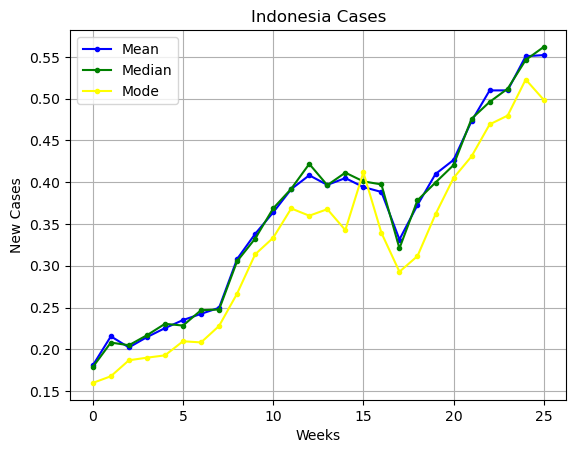

In [30]:
display_country_cases(idn_cases_means, idn_cases_medians, idn_cases_modes, "Indonesia Cases")

Indonesia's cases reached a local peak at around 12 weeks, where they dropped a bit before hitting an all time high around the 25th week.

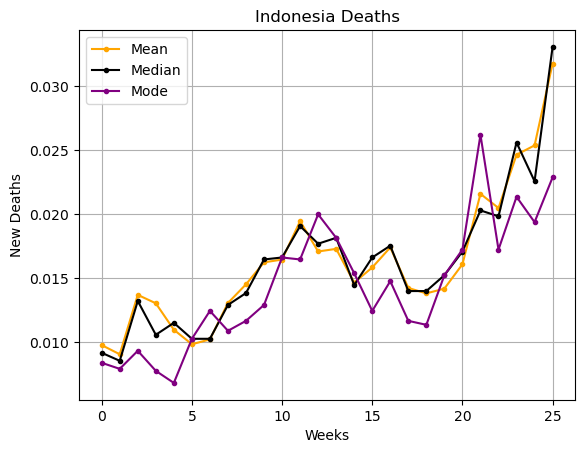

In [31]:
display_country_deaths(idn_deaths_means, idn_deaths_medians, idn_deaths_modes, "Indonesia Deaths")

Indonesia's deaths represents the same trend as the cases. There is a peak at week 12, and a global maximum peak at week 25.

Indonesia seemed to be doing relatively well compared to our other countries around the end of summer, but cases start to go up around week 12, and hit their biggest spike at the end of the year, which may be explained by holiday travel for events such as Christmas, celebrated by more than 10% of Indonesia's Christian minority.

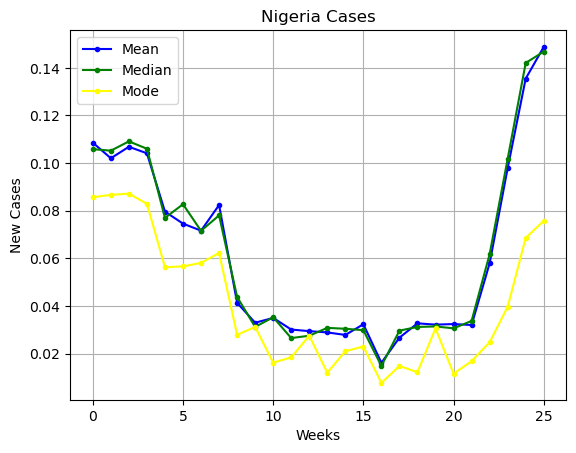

In [32]:
display_country_cases(nga_cases_means, nga_cases_medians, nga_cases_modes, "Nigeria Cases")

Nigeria starts out in our dataset in what seems to be the middle of a peak. Afterwards, new cases slows down until they ramp back up in the 20th week to a new maximum at week 25, which is their highest peak.

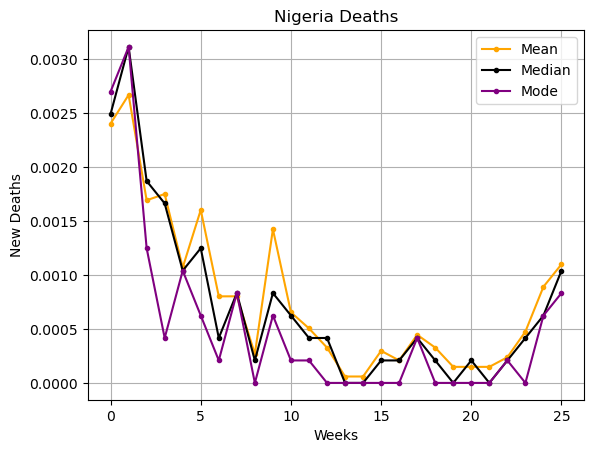

In [33]:
display_country_deaths(nga_deaths_means, nga_deaths_medians, nga_deaths_modes, "Nigeria Deaths")

Nigerian deaths start out high as well, but they don't end at as high of a value as the cases do, although they do end at a considerable uptick in deaths. It is possible that the big spike of cases would translate to deaths increasing as well if we were to extend the range of this graph. The peak week for deaths in Nigeria is week 1.

Nigeria struggled with implementing lockdowns in 2020, with the total lockdowns implemented in March failing to prevent community transmission, and only serving to cripple the nation's economy. The lockdowns were lifted in May, and cases began to spread like never before, hitting a peak in the summer. This may explain the big spike in deaths at the beginning of our observation range.

Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7490626/

The spike in cases and increase in deaths may also be attributed to holiday travel, as Nigeria is a country with a sizeable Christian population that may have been traveling for Christmas.


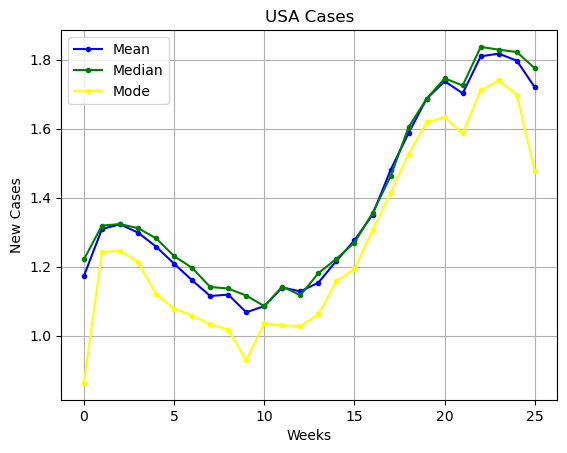

In [34]:
display_country_cases(usa_cases_means, usa_cases_medians, usa_cases_modes, "USA Cases")

The trends in the USA were examined earlier, along with hypotheses for the causes of their trends, so there is no need to go over them again. This graph represents the same trends, the only difference is that the data is normalized and reduced for easy comparison with other countries.

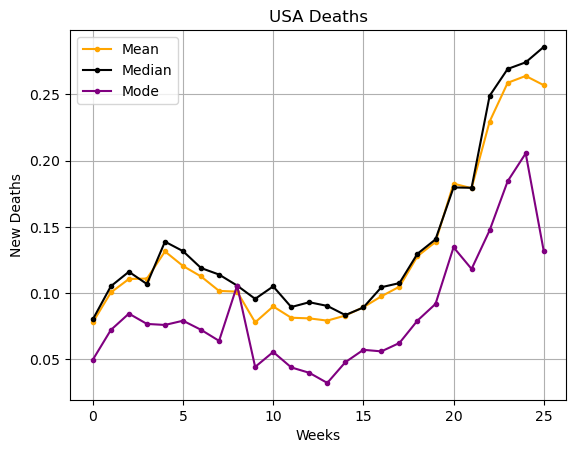

In [35]:
display_country_deaths(usa_deaths_means, usa_deaths_medians, usa_deaths_modes, "USA Deaths")

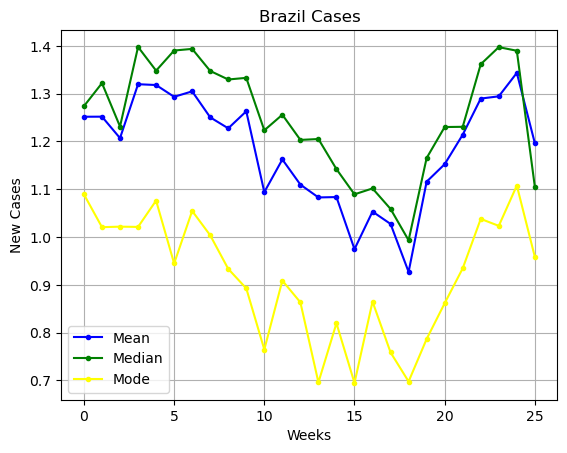

In [36]:
display_country_cases(bra_cases_means, bra_cases_medians, bra_cases_modes, "Brazil Cases")

Brazil starts out very high, with a peak at week 3, after which it slightly decreases until hitting a new peak at around week 23 or 24.

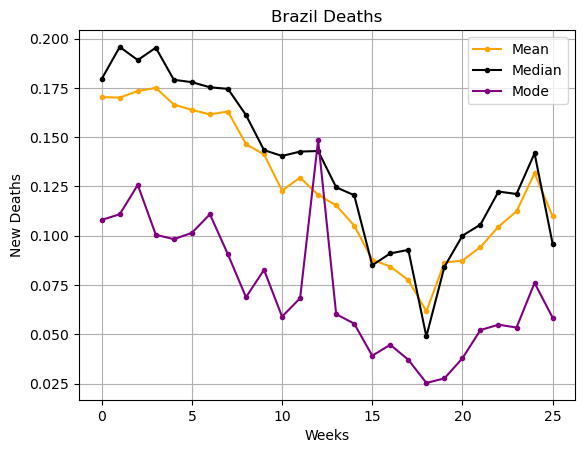

In [37]:
display_country_deaths(bra_deaths_means, bra_deaths_medians, bra_deaths_modes, "Brazil Deaths")

Brazil's deaths start out at a peak at week 4, where they dipped for a while until ramping back up for a new peak at week 24.

The early peak may be related to the ease of transmission in warm weather. The last peak, in December, may be related to holiday travel, for occasions such as Christmas, which Brazil celebrates as "Natal", being 88% Christian.

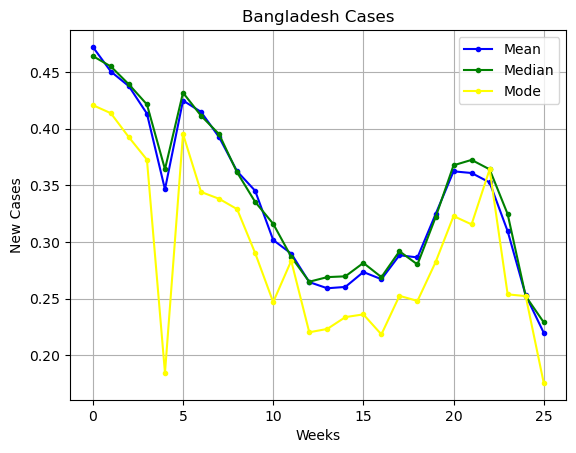

In [38]:
display_country_cases(bgd_cases_means, bgd_cases_medians, bgd_cases_modes, "Bangladesh Cases")

Bangladesh's cases start out at it's highest value in week 0, after which there is a sharp dip before another, lower peak at week 5, and then falling and ramping up to hit a new peak at week 21.

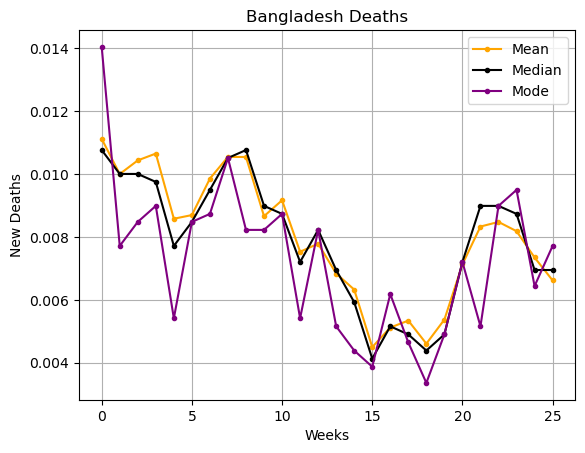

In [39]:
display_country_deaths(bgd_deaths_means, bgd_deaths_medians, bgd_deaths_modes, "Bangladesh Deaths")

Bangladesh's deaths start out a peak as well, and reach peaks at around same time as the cases: in week 8 and around week 22.

The peak at the beginning may be related to ease of transmission in warm summer months. Although many holidays are associated with increased travel and disease spread, the times that local holidays like Mawlid and Krishna Janmashtami are marked by a low covid cases and deaths. Bangladesh does celebrate Christmas as a public holiday where it is known as Boro Din, despite less than .03 of the population being Christian, due to spread of the holiday by Christian missionaries. This may help explain the peak in the later weeks.

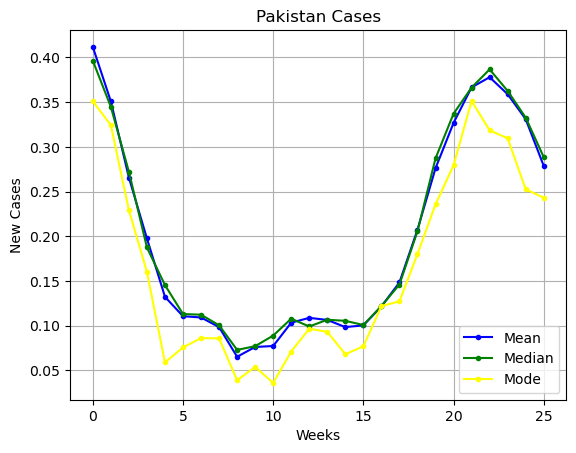

In [40]:
display_country_cases(pak_cases_means, pak_cases_medians, pak_cases_modes, "Pakistan Cases")

Pakistan's cases start out at a their highest at week 0, before steadily decreasing for months, and then hitting a new peak at around week 22.

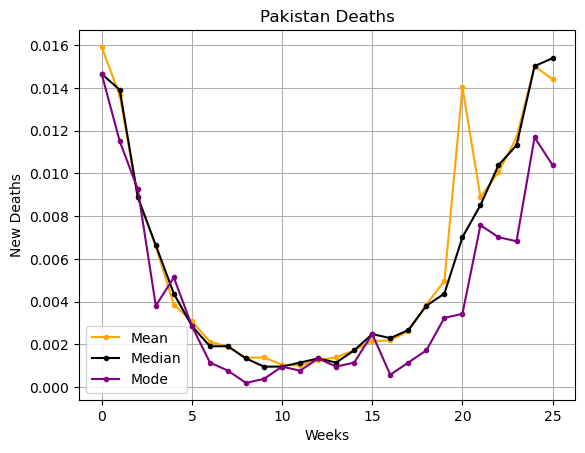

In [41]:
display_country_deaths(pak_deaths_means, pak_deaths_medians, pak_deaths_modes, "Pakistan Deaths")

Pakistan's deaths generally follow the same trend. There is a peak at week zero and around the end at week 24, and a lull between weeks 6 and 17.

In Pakistan, the summer peak may be partially explained by the ease of the disease's spread in warm weather. The peak in the later half of the data may be explained by the celebration of both Christmas as well as the celebration of Quaid-e-Azam Day, the birthday of Pakistan's founder, which is celebrated on the same day.

Pakistan's data reflects their policy during this time of "smart lockdowns," where widespread lockdowns were uncommon, but when there is an outbreak, public transport and businesses in the area are shut down, to reduce spread, which leads to a visible drop after the outbreak at the beginning of July as their lockdowns were put in place, and perhaps relaxed over time which led to a new outbreak around the end of the year.

source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9982052/#:~:text=Pakistan%20enforced%20a%20complete%20lockdown,provinces%20banned%20inter%2Dcity%20travel.

You can see that the mean, median and mode generally follow a specific curve for each graph. So, to compare all countries together in a single chart, we can use their means as a point of comparison.

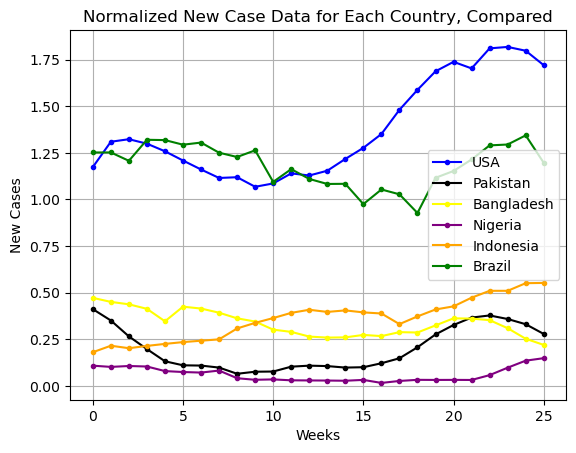

In [47]:
x = np.arange(len(usa_cases_means))

plt.plot(x, usa_cases_means, label='USA', marker='.', linestyle='-', color='blue')
plt.plot(x, pak_cases_means, label='Pakistan', marker='.', linestyle='-', color='black')
plt.plot(x, bgd_cases_means, label='Bangladesh', marker='.', linestyle='-', color='yellow')
plt.plot(x, nga_cases_means, label='Nigeria', marker='.', linestyle='-', color='purple')
plt.plot(x, idn_cases_means, label='Indonesia', marker='.', linestyle='-', color='orange')
plt.plot(x, bra_cases_means, label='Brazil', marker='.', linestyle='-', color='green')

    
plt.xlabel('Weeks')
plt.ylabel('New Cases')
plt.title('Normalized New Case Data for Each Country, Compared')
plt.legend()

    
plt.grid(True)
plt.show()

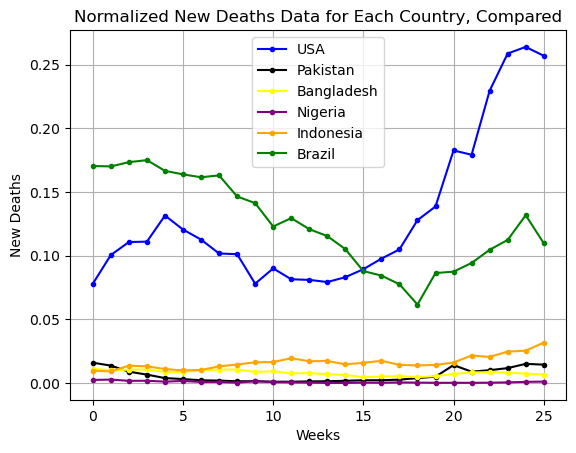

In [46]:
x = np.arange(len(usa_deaths_means))

plt.plot(x, usa_deaths_means, label='USA', marker='.', linestyle='-', color='blue')
plt.plot(x, pak_deaths_means, label='Pakistan', marker='.', linestyle='-', color='black')
plt.plot(x, bgd_deaths_means, label='Bangladesh', marker='.', linestyle='-', color='yellow')
plt.plot(x, nga_deaths_means, label='Nigeria', marker='.', linestyle='-', color='purple')
plt.plot(x, idn_deaths_means, label='Indonesia', marker='.', linestyle='-', color='orange')
plt.plot(x, bra_deaths_means, label='Brazil', marker='.', linestyle='-', color='green')

    
plt.xlabel('Weeks')
plt.ylabel('New Deaths')
plt.title('Normalized New Deaths Data for Each Country, Compared')
plt.legend()

    
plt.grid(True)
plt.show()

When comparing these six countries, it seems apparent that the USA and Brazil handled the pandemic response more poorly than other countries. This may be due to multiple factors.

1) The USA and Brazil are Christian majority countries, which may place greater importance on holiday travel, unlike the rest of these countries that are Muslim majority.

2) The USA and Brazil are larger, less densely populated countries, whereas the other 4 are comparatively quite dense. With a larger area, it becomes more common for citizens to travel long distances, which can exacerbate pandemic conditions.

3) Both countries, during the period at the beginning of the pandemic, had leaders that repeatedly downplayed the gravity of the situation, and resisted attempts to instate strict lockdowns.

Sources:
https://www.hrw.org/news/2021/10/27/toll-bolsonaros-disastrous-covid-19-response

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9115435/